In [96]:
# Import library
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [97]:
# Load dataset
# Memuat dataset
data = pd.read_csv('../Dataset/Car Data.csv')
data.head(10)


,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.000
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.000
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.000
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.000
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.000
5,6,2,audi fox,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250.000
6,7,1,audi 100ls,gas,std,four,sedan,fwd,front,105.8,192.7,71.4,55.7,2844,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710.000
7,8,1,audi 5000,gas,std,four,wagon,fwd,front,105.8,192.7,71.4,55.7,2954,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920.000
8,9,1,audi 4000,gas,turbo,four,sedan,fwd,front,105.8,192.7,71.4,55.9,3086,ohc,five,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875.000
9,10,0,audi 5000s (diesel),gas,turbo,two,hatchback,4wd,front,99.5,178.2,67.9,52.0,3053,ohc,five,131,mpfi,3.13,3.40,7.0,160,5500,16,22,17859.167


# Data cleaning

In [98]:
data.isna().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [99]:
data.duplicated().sum()

0

In [100]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [101]:
data.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


# Data preprocessing

In [102]:
# Ekstrak nama perusahaan dari kolom 'CarName' dengan mengambil kata pertama
data['company'] = data['CarName'].apply(lambda x: x.split(' ')[0].lower())

# Normalisasi nama perusahaan untuk konsistensi (contoh: mengganti 'vw' menjadi 'volkswagen')
data['company'] = data['company'].replace('vw', 'volkswagen')


In [103]:
# Separate target and features
# 'price' is the target variable, other columns are features
X = data.drop(['price', 'CarName', 'car_ID'], axis=1)  # Drop irrelevant columns
y = data['price']  # Define the target variable

In [104]:
# Identify categorical and numerical features
categorical_features = X.select_dtypes(include=['object']).columns  # Categorical columns
numerical_features = X.select_dtypes(include=['number']).columns   # Numerical columns
print(categorical_features)

Index(['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel',
       'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem',
       'company'],
      dtype='object')


In [105]:
# Separate categorical features for different encoding
# One-Hot Encoding will be used for these features
features_one_hot = ['fueltype', 'aspiration', 'doornumber', 'carbody', 
                    'drivewheel', 'enginelocation','company']

# Label Encoding will be used for these features
features_label_encode = ['enginetype', 'cylindernumber', 'fuelsystem']

In [106]:
# Apply One-Hot Encoding
encoder = OneHotEncoder(drop='first', sparse_output=False)  # Use sparse_output instead of sparse
X_one_hot = encoder.fit_transform(X[features_one_hot])  # Apply One-Hot Encoding

# Convert encoded features to a DataFrame with appropriate column names
X_one_hot = pd.DataFrame(X_one_hot, columns=encoder.get_feature_names_out(features_one_hot))

In [107]:
# Apply Label Encoding
label_encoded_data = X[features_label_encode].apply(LabelEncoder().fit_transform)

In [108]:
# Combine all processed features
# Merge numerical features, One-Hot Encoded features, and Label Encoded features
X_final = pd.concat([X[numerical_features].reset_index(drop=True),
                     X_one_hot.reset_index(drop=True),
                     label_encoded_data.reset_index(drop=True)], axis=1)

In [109]:
X_final.head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,fueltype_gas,aspiration_turbo,doornumber_two,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginelocation_rear,company_audi,company_bmw,company_buick,company_chevrolet,company_dodge,company_honda,company_isuzu,company_jaguar,company_maxda,company_mazda,company_mercury,company_mitsubishi,company_nissan,company_peugeot,company_plymouth,company_porcshce,company_porsche,company_renault,company_saab,company_subaru,company_toyota,company_toyouta,company_vokswagen,company_volkswagen,company_volvo,enginetype,cylindernumber,fuelsystem
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,2,5
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,2,5
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5,3,5
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,2,5
4,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,1,5


In [110]:
# Standardize numerical features
scaler = StandardScaler()
X_final[numerical_features] = scaler.fit_transform(X_final[numerical_features])

In [111]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.2, random_state=42)


In [112]:
# Build and train the regression model
model = LinearRegression()  # Instantiate the Linear Regression model
model.fit(X_train, y_train)  # Train the model on the training data

LinearRegression()

In [113]:
# Make predictions on the test set
y_pred = model.predict(X_test)  # Predict the target variable for the test data

In [114]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)  # Mean Squared Error
r2 = r2_score(y_test, y_pred)  # R-squared metric

print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'R-squared (R²): {r2:.2f}')

Mean Squared Error (MSE): 8635315.60
R-squared (R²): 0.89


In [115]:
# Analyze the model's coefficients
coefficients = pd.DataFrame({'Feature': X_final.columns, 'Coefficient': model.coef_})
coefficients = coefficients.sort_values(by='Coefficient', ascending=False)
print(coefficients)

                Feature   Coefficient
23  enginelocation_rear  9.419712e+03
26        company_buick  8.715506e+03
40      company_porsche  6.185390e+03
25          company_bmw  6.135470e+03
39     company_porcshce  4.172557e+03
31       company_jaguar  2.828301e+03
5            curbweight  2.335536e+03
42         company_saab  2.314772e+03
6            enginesize  2.050831e+03
1             wheelbase  1.575474e+03
24         company_audi  1.344481e+03
3              carwidth  1.322465e+03
15     aspiration_turbo  1.294509e+03
50       cylindernumber  6.458070e+02
11              peakrpm  6.172413e+02
13           highwaympg  3.802587e+02
10           horsepower  3.727753e+02
48        company_volvo  2.289842e+02
46    company_vokswagen  1.222134e-12
0             symboling -2.004181e+01
12              citympg -6.225026e+01
49           enginetype -9.011307e+01
51           fuelsystem -1.165431e+02
8                stroke -1.378827e+02
22       drivewheel_rwd -1.803783e+02
4           

In [116]:
from xgboost import XGBRegressor
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [117]:
y_pred = xgb_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Mean Squared Error: 5196629.867802421
R-squared: 0.9341732304752481


In [118]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

grid_search = GridSearchCV(estimator=XGBRegressor(random_state=42),
                           param_grid=param_grid,
                           scoring='neg_mean_squared_error',
                           cv=3,
                           verbose=2)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
print(f"Best Parameters: {grid_search.best_params_}")


Fitting 3 folds for each of 27 candidates, totalling 81 fits
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.0s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.0s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.0s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=200; total time=   0.0s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=200; total time=   0.0s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=200; total time=   0.0s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=300; total time=   0.0s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=300; total time=   0.0s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=300; total time=   0.1s
[CV] END ..learning_rate=0.01, max_depth=5, n_estimators=100; total time=   0.0s
[CV] END ..learning_rate=0.01, max_depth=5, n_estimators=100; total time=   0.0s
[CV] END ..learning_rate=0.01, max_depth=5, n_es

In [119]:
y_pred = best_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 5530790.270826018
R-squared: 0.9299403525536512


In [120]:
X_test.head()


,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,fueltype_gas,aspiration_turbo,doornumber_two,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginelocation_rear,company_audi,company_bmw,company_buick,company_chevrolet,company_dodge,company_honda,company_isuzu,company_jaguar,company_maxda,company_mazda,company_mercury,company_mitsubishi,company_nissan,company_peugeot,company_plymouth,company_porcshce,company_porsche,company_renault,company_saab,company_subaru,company_toyota,company_toyouta,company_vokswagen,company_volkswagen,company_volvo,enginetype,cylindernumber,fuelsystem
15,-0.671472,0.789639,1.214799,0.463650,0.810288,1.298465,1.976184,1.074252,0.430217,-0.540725,1.974339,0.577692,-1.412700,-1.273900,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,3,5
9,-0.671472,0.123757,0.337262,0.930947,-0.707626,0.957693,0.098522,-0.739338,0.462183,-0.793101,1.416637,0.787855,-1.412700,-1.273900,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,1,5
100,-0.671472,-0.259126,-0.052755,-0.330755,0.400041,-0.488182,-0.166277,0.000903,0.685946,-0.414537,-0.180418,0.157366,0.272823,0.472920,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,2,1
132,1.743470,0.057168,1.019791,0.276731,0.974387,0.197213,-0.142204,0.778156,-0.592699,-0.210112,0.149133,0.262448,-0.646553,-0.400490,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3,2,5
68,-1.476452,1.871697,1.369181,2.052461,2.041030,2.299604,1.350297,0.926204,1.229370,2.866352,0.478684,-1.629021,-0.493324,-0.837195,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,1,3


In [121]:
y_test.head()

15     30760.000
9      17859.167
100     9549.000
132    11850.000
68     28248.000
Name: price, dtype: float64

In [122]:
# new_data = [[-0.671472,0.789639,1.214799,0.463650,0.810288,1.298465,1.976184,1.074252,0.430217,-0.540725,1.974339,0.577692,-1.412700,-1.273900,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,3,3,5]]  # Contoh data baru (fitur sesuai dataset)
# new_pred = best_model.predict(new_data)
# print(f"Predicted Price: {new_pred}")



In [123]:
import pandas as pd
import numpy as np
from scipy import stats

# Load your dataset (replace with actual dataset path)
# data = pd.read_csv('your_dataset.csv')

# 1. Z-Score Method for 'price'
z_scores_price = np.abs(stats.zscore(data['price']))
outliers_z = data['price'][z_scores_price > 3]  # Filter out outliers based on Z-Score
print("Outliers detected by Z-Score method:\n", outliers_z)

# 2. IQR Method for 'price'
Q1_price = data['price'].quantile(0.25)
Q3_price = data['price'].quantile(0.75)
IQR_price = Q3_price - Q1_price

# Lower and upper bounds for 'price'
lower_bound_price = Q1_price - 1.5 * IQR_price
upper_bound_price = Q3_price + 1.5 * IQR_price

# Detect outliers based on IQR
outliers_iqr = data['price'][(data['price'] < lower_bound_price) | (data['price'] > upper_bound_price)]
print("Outliers detected by IQR method:\n", outliers_iqr)


Outliers detected by Z-Score method:
 16    41315.0
73    40960.0
74    45400.0
Name: price, dtype: float64
Outliers detected by IQR method:
 15     30760.0
16     41315.0
17     36880.0
47     32250.0
48     35550.0
49     36000.0
70     31600.0
71     34184.0
72     35056.0
73     40960.0
74     45400.0
126    32528.0
127    34028.0
128    37028.0
129    31400.5
Name: price, dtype: float64


In [124]:
import pandas as pd
import numpy as np
from scipy import stats

# Load dataset (ganti dengan path dataset asli)
# data = pd.read_csv("your_dataset.csv")

# Pilih hanya kolom numerik
numerical_columns = ['wheelbase', 'carlength', 'carwidth', 'curbweight', 'enginesize', 'horsepower', 'citympg', 'highwaympg']

# 1. Z-Score Method for all numerical columns
print("Outliers detected by Z-Score method:\n")
for col in numerical_columns:
    z_scores = np.abs(stats.zscore(data[col]))
    outliers_z = data[col][z_scores > 3]  # Filter hanya nilai outlier
    if not outliers_z.empty:
        print(f"{col}:\n{outliers_z}\n")

# 2. IQR Method for all numerical columns
print("Outliers detected by IQR method:\n")
for col in numerical_columns:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1

    # Definisikan batas bawah dan atas
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Deteksi outlier berdasarkan IQR
    outliers_iqr = data[col][(data[col] < lower_bound) | (data[col] > upper_bound)]
    if not outliers_iqr.empty:
        print(f"{col}:\n{outliers_iqr}\n")


Outliers detected by Z-Score method:

wheelbase:
73    120.9
Name: wheelbase, dtype: float64

enginesize:
47    258
48    258
49    326
73    308
74    304
Name: enginesize, dtype: int64

horsepower:
49     262
129    288
Name: horsepower, dtype: int64

citympg:
18    47
30    49
90    45
Name: citympg, dtype: int64

highwaympg:
18    53
30    54
Name: highwaympg, dtype: int64

Outliers detected by IQR method:

wheelbase:
70    115.6
71    115.6
73    120.9
Name: wheelbase, dtype: float64

carlength:
18    141.1
Name: carlength, dtype: float64

carwidth:
6      71.4
7      71.4
8      71.4
70     71.7
71     71.7
73     71.7
74     72.0
129    72.3
Name: carwidth, dtype: float64

enginesize:
15    209
16    209
17    209
47    258
48    258
49    326
71    234
72    234
73    308
74    304
Name: enginesize, dtype: int64

horsepower:
49     262
105    200
126    207
127    207
128    207
129    288
Name: horsepower, dtype: int64

citympg:
18    47
30    49
Name: citympg, dtype: int64

h

In [125]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = X_final.columns
vif_data["VIF"] = [variance_inflation_factor(X_final.values, i) for i in range(X_final.shape[1])]

# Display VIF values
print(vif_data)


                Feature         VIF
0             symboling    5.542825
1             wheelbase   16.714512
2             carlength   21.416289
3              carwidth   13.956313
4             carheight    6.904014
5            curbweight   37.994455
6            enginesize   27.138592
7             boreratio    5.834723
8                stroke    4.250994
9      compressionratio   26.175357
10           horsepower   26.302322
11              peakrpm    4.864335
12              citympg   49.917274
13           highwaympg   42.920097
14         fueltype_gas  210.328099
15     aspiration_turbo    5.008162
16       doornumber_two    6.679438
17      carbody_hardtop    3.653600
18    carbody_hatchback   25.209848
19        carbody_sedan   41.473813
20        carbody_wagon   13.003125
21       drivewheel_fwd   28.106084
22       drivewheel_rwd   28.378213
23  enginelocation_rear    5.399588
24         company_audi    7.428571
25          company_bmw    5.867728
26        company_buick    9

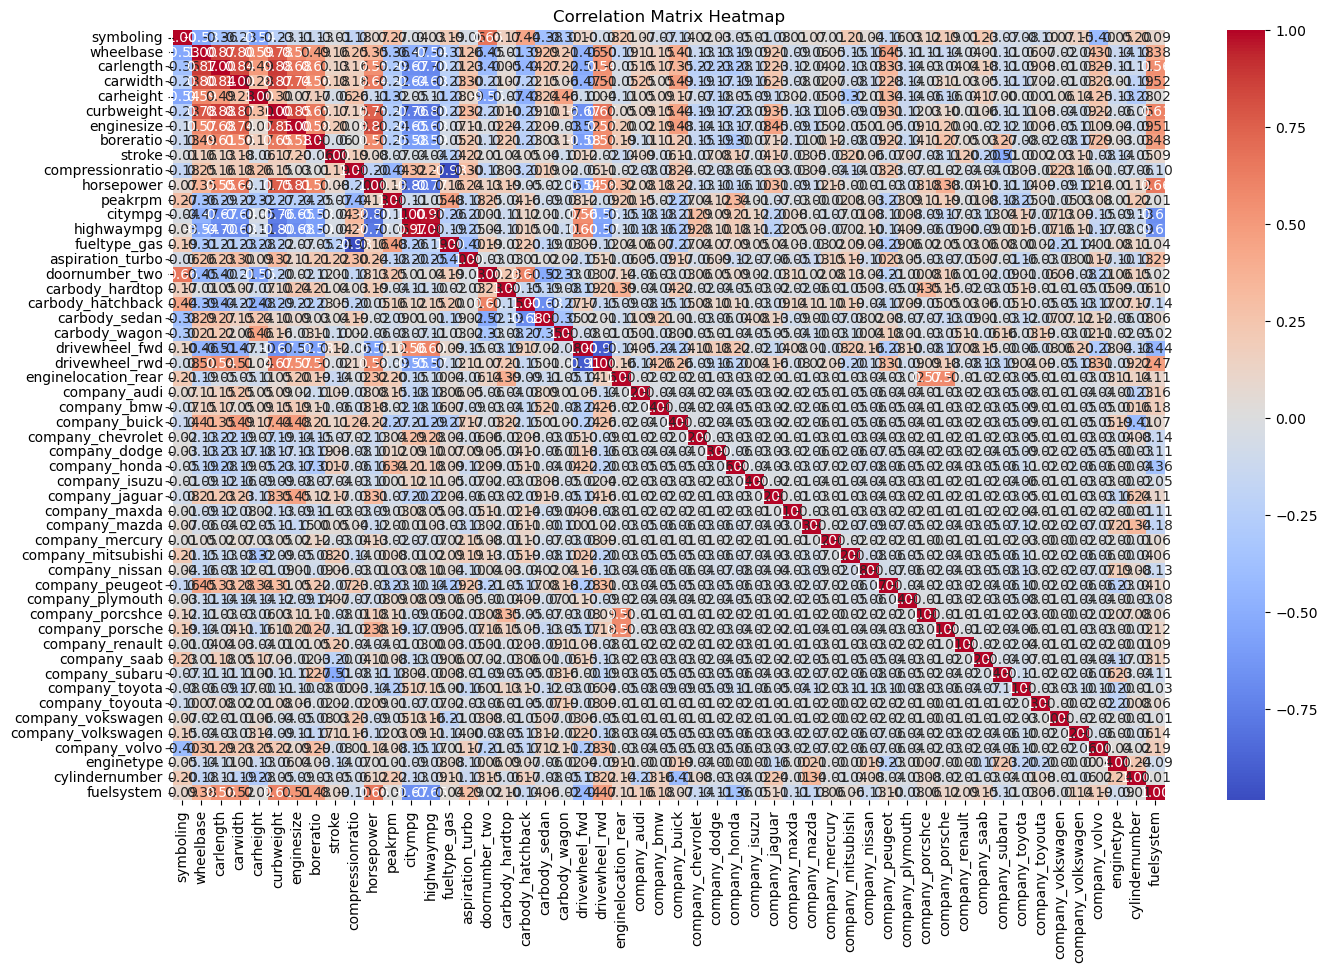

In [126]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the correlation matrix for numerical features
correlation_matrix = X_final.corr()

# # Display the correlation matrix as a table
# print("Correlation Matrix:")
# print(correlation_matrix)

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(16, 10))  # Adjust the figure size
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix Heatmap")
plt.show()


Updated VIF after dropping columns:
                Feature        VIF
0             symboling   5.043483
1             wheelbase  14.303003
2             carlength  18.142004
3              carwidth  11.664026
4             carheight   6.280689
5            enginesize   9.788729
6             boreratio   5.655714
7                stroke   3.967704
8      compressionratio   3.602944
9               peakrpm   3.417704
10              citympg   9.715170
11     aspiration_turbo   3.016540
12       doornumber_two   6.289972
13      carbody_hardtop   3.172442
14    carbody_hatchback  22.716183
15        carbody_sedan  35.508258
16        carbody_wagon  11.890885
17       drivewheel_rwd  11.147295
18  enginelocation_rear   5.146367
19         company_audi   4.641735
20          company_bmw   4.814654
21        company_buick   5.603311
22    company_chevrolet   2.812900
23        company_dodge   4.814047
24        company_honda   6.888672
25        company_isuzu   2.724233
26       company_ja

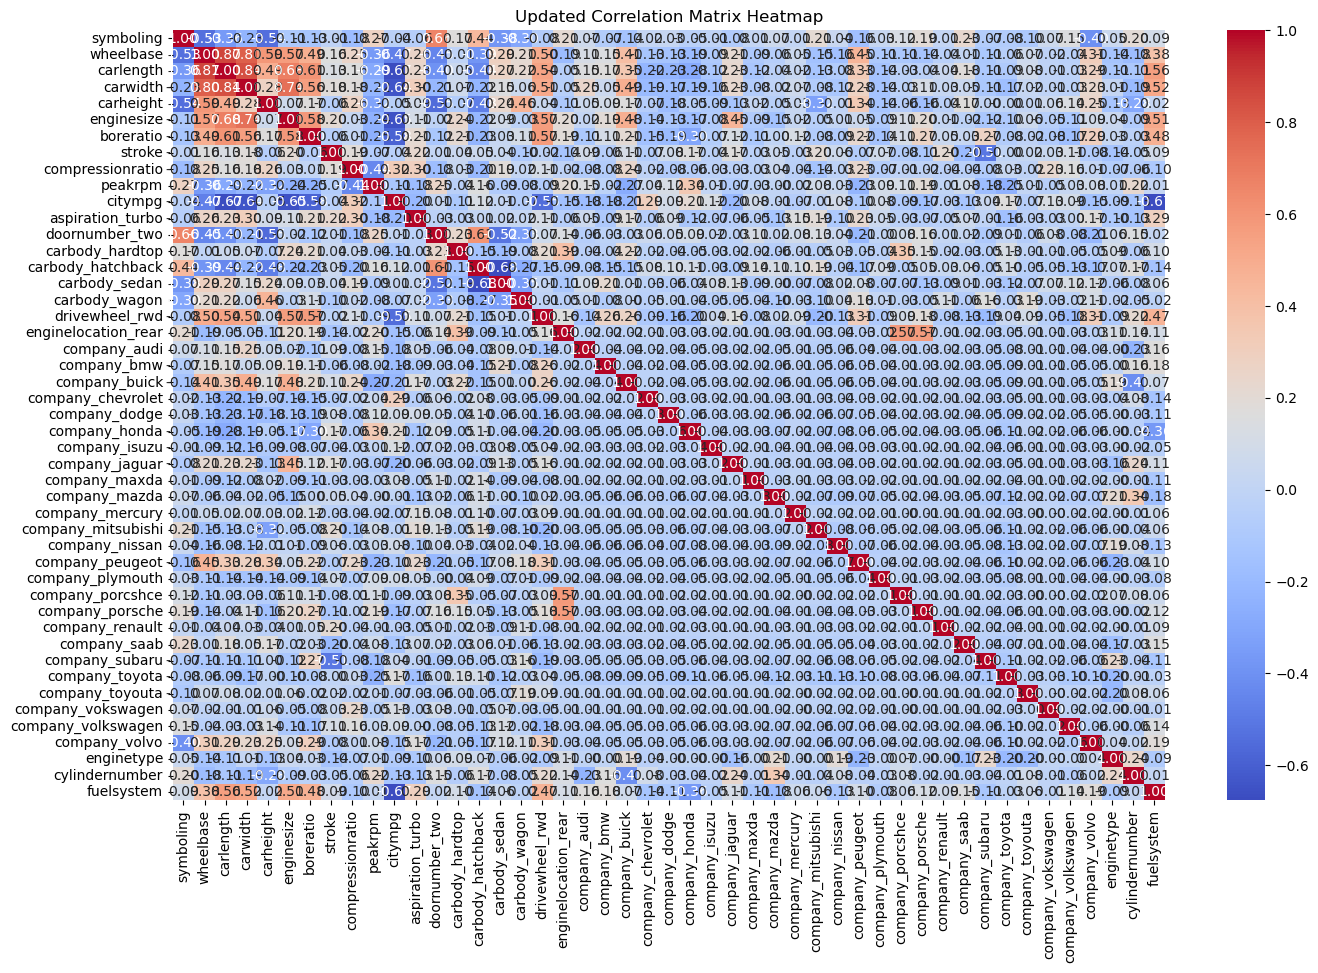

In [127]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Drop highly correlated columns
# Example: Drop 'highwaympg' and 'fueltype_gas'
X_final_reduced = X_final.drop(['highwaympg', 'fueltype_gas','curbweight', 'drivewheel_fwd', 'horsepower'], axis=1)

# Step 2: Recalculate VIF
vif_data_reduced = pd.DataFrame()
vif_data_reduced["Feature"] = X_final_reduced.columns
vif_data_reduced["VIF"] = [variance_inflation_factor(X_final_reduced.values, i) for i in range(X_final_reduced.shape[1])]

# Display VIF values
print("Updated VIF after dropping columns:")
print(vif_data_reduced)

# Step 3: Recalculate Correlation Matrix
correlation_matrix_reduced = X_final_reduced.corr()

# # Display the correlation matrix as a table
# print("\nUpdated Correlation Matrix:")
# print(correlation_matrix_reduced)

# Step 4: Visualize the Correlation Matrix
plt.figure(figsize=(16, 10))
sns.heatmap(correlation_matrix_reduced, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Updated Correlation Matrix Heatmap")
plt.show()


In [130]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_final_reduced, y, test_size=0.2, random_state=42)

# Train regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R²): {r2:.2f}")


Mean Squared Error (MSE): 9219528.68
R-squared (R²): 0.88


In [131]:
from xgboost import XGBRegressor
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
xgb_model.fit(X_train, y_train)

y_pred = best_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

ValueError: feature_names mismatch: ['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'fueltype_gas', 'aspiration_turbo', 'doornumber_two', 'carbody_hardtop', 'carbody_hatchback', 'carbody_sedan', 'carbody_wagon', 'drivewheel_fwd', 'drivewheel_rwd', 'enginelocation_rear', 'company_audi', 'company_bmw', 'company_buick', 'company_chevrolet', 'company_dodge', 'company_honda', 'company_isuzu', 'company_jaguar', 'company_maxda', 'company_mazda', 'company_mercury', 'company_mitsubishi', 'company_nissan', 'company_peugeot', 'company_plymouth', 'company_porcshce', 'company_porsche', 'company_renault', 'company_saab', 'company_subaru', 'company_toyota', 'company_toyouta', 'company_vokswagen', 'company_volkswagen', 'company_volvo', 'enginetype', 'cylindernumber', 'fuelsystem'] ['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'peakrpm', 'citympg', 'aspiration_turbo', 'doornumber_two', 'carbody_hardtop', 'carbody_hatchback', 'carbody_sedan', 'carbody_wagon', 'drivewheel_rwd', 'enginelocation_rear', 'company_audi', 'company_bmw', 'company_buick', 'company_chevrolet', 'company_dodge', 'company_honda', 'company_isuzu', 'company_jaguar', 'company_maxda', 'company_mazda', 'company_mercury', 'company_mitsubishi', 'company_nissan', 'company_peugeot', 'company_plymouth', 'company_porcshce', 'company_porsche', 'company_renault', 'company_saab', 'company_subaru', 'company_toyota', 'company_toyouta', 'company_vokswagen', 'company_volkswagen', 'company_volvo', 'enginetype', 'cylindernumber', 'fuelsystem']
expected curbweight, highwaympg, horsepower, fueltype_gas, drivewheel_fwd in input data